# Dataset exploration

In [44]:
import pandas as pd
archivo_csv = 'datos_lluvia.csv'
datos_csv = pd.read_csv(archivo_csv)

In [45]:
df = pd.DataFrame(datos_csv)
df

,CodigoEstacion,NombreEstacion,Latitud,Longitud,Altitud,Categoria,Entidad,AreaOperativa,Departamento,Municipio,...,FechaSuspension,IdParametro,Etiqueta,DescripcionSerie,Frecuencia,Fecha,Valor,Grado,Calificador,NivelAprobacion
0,26135040,AEROPUERTO MATECANA [26135040],4.815861,-75.737222,1342,Sinóptica Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 09 - Cauca-Valle-Caldas,Risaralda,Pereira,...,NaN,PRECIPITACION,PTPM_CON,Día pluviométrico (convencional),Diaria,2013-07-22 00:00,21.1,50,NaN,1100
1,26135040,AEROPUERTO MATECANA [26135040],4.815861,-75.737222,1342,Sinóptica Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 09 - Cauca-Valle-Caldas,Risaralda,Pereira,...,NaN,PRECIPITACION,PTPM_CON,Día pluviométrico (convencional),Diaria,2013-07-23 00:00,0.0,50,NaN,1100
2,26135040,AEROPUERTO MATECANA [26135040],4.815861,-75.737222,1342,Sinóptica Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 09 - Cauca-Valle-Caldas,Risaralda,Pereira,...,NaN,PRECIPITACION,PTPM_CON,Día pluviométrico (convencional),Diaria,2013-07-24 00:00,0.0,50,NaN,1100
3,26135040,AEROPUERTO MATECANA [26135040],4.815861,-75.737222,1342,Sinóptica Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 09 - Cauca-Valle-Caldas,Risaralda,Pereira,...,NaN,PRECIPITACION,PTPM_CON,Día pluviométrico (convencional),Diaria,2013-07-25 00:00,0.0,50,NaN,1100
4,26135040,AEROPUERTO MATECANA [26135040],4.815861,-75.737222,1342,Sinóptica Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 09 - Cauca-Valle-Caldas,Risaralda,Pereira,...,NaN,PRECIPITACION,PTPM_CON,Día pluviométrico (convencional),Diaria,2013-07-26 00:00,0.0,50,NaN,1100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4102,26135040,AEROPUERTO MATECANA [26135040],4.815861,-75.737222,1342,Sinóptica Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 09 - Cauca-Valle-Caldas,Risaralda,Pereira,...,NaN,PRECIPITACION,PTPM_CON,Día pluviométrico (convencional),Diaria,2024-11-17 00:00,27.4,50,NaN,900
4103,26135040,AEROPUERTO MATECANA [26135040],4.815861,-75.737222,1342,Sinóptica Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 09 - Cauca-Valle-Caldas,Risaralda,Pereira,...,NaN,PRECIPITACION,PTPM_CON,Día pluviométrico (convencional),Diaria,2024-11-18 00:00,64.3,50,NaN,900
4104,26135040,AEROPUERTO MATECANA [26135040],4.815861,-75.737222,1342,Sinóptica Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 09 - Cauca-Valle-Caldas,Risaralda,Pereira,...,NaN,PRECIPITACION,PTPM_CON,Día pluviométrico (convencional),Diaria,2024-11-19 00:00,5.1,50,NaN,900
4105,26135040,AEROPUERTO MATECANA [26135040],4.815861,-75.737222,1342,Sinóptica Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 09 - Cauca-Valle-Caldas,Risaralda,Pereira,...,NaN,PRECIPITACION,PTPM_CON,Día pluviométrico (convencional),Diaria,2024-11-20 00:00,4.8,50,NaN,900


In [46]:
fields = ['Fecha', 'Valor']
new_df = df[fields].copy()
new_df['Fecha'] = pd.to_datetime(new_df['Fecha']).dt.date
new_df

,Fecha,Valor
0,2013-07-22,21.1
1,2013-07-23,0.0
2,2013-07-24,0.0
3,2013-07-25,0.0
4,2013-07-26,0.0
...,...,...
4102,2024-11-17,27.4
4103,2024-11-18,64.3
4104,2024-11-19,5.1
4105,2024-11-20,4.8


In [47]:
import pandas as pd

# Asegúrate de que la columna de fechas sea datetime
new_df['Fecha'] = pd.to_datetime(new_df['Fecha'])

# Filtra desde el 1 de enero de 2015
start_date = '2014-01-01'
filtered_df = new_df[new_df['Fecha'] >= start_date].copy()  # Usamos .copy() para evitar modificar el original

# Añade una columna para identificar las semanas (cada semana tendrá un número único)
filtered_df.loc[:, 'Semana'] = ((filtered_df['Fecha'] - pd.Timestamp(start_date)).dt.days // 7)

# Agrupa por número de semana y calcula el promedio
weekly_avg = filtered_df.groupby('Semana')['Valor'].mean().reset_index()

# Si quieres añadir las fechas de inicio de cada semana
weekly_avg['Fecha_Inicio'] = pd.to_datetime(start_date) + pd.to_timedelta(weekly_avg['Semana'] * 7, unit='d')

# Renombra las columnas para mayor claridad
weekly_avg.rename(columns={'Valor': 'Promedio_Semanal'}, inplace=True)

print(weekly_avg)


     Semana  Promedio_Semanal Fecha_Inicio
0         0          2.228571   2014-01-01
1         1          5.428571   2014-01-08
2         2          4.242857   2014-01-15
3         3          0.214286   2014-01-22
4         4          0.657143   2014-01-29
..      ...               ...          ...
563     564          3.028571   2024-10-23
564     565          3.671429   2024-10-30
565     566         10.500000   2024-11-06
566     567         16.483333   2024-11-13
567     568          2.550000   2024-11-20

[568 rows x 3 columns]


In [48]:
# # Asegúrate de que la columna de fechas sea datetime
# new_df['Fecha'] = pd.to_datetime(new_df['Fecha'])

# # Filtra desde el 1 de enero de 2015
# start_date = '2015-01-01'
# filtered_df = new_df[new_df['Fecha'] >= start_date].copy()  # Usa .copy() para evitar modificar el original

# # Ignora los valores de lluvia iguales a cero
# filtered_df = filtered_df[filtered_df['Valor'] > 0]

# # Añade una columna para identificar las semanas (cada semana tendrá un número único)
# filtered_df.loc[:, 'Semana'] = ((filtered_df['Fecha'] - pd.Timestamp(start_date)).dt.days // 7)

# # Agrupa por número de semana y calcula el promedio
# weekly_avg = filtered_df.groupby('Semana')['Valor'].mean().reset_index()

# # Si quieres añadir las fechas de inicio de cada semana
# weekly_avg['Fecha_Inicio'] = pd.to_datetime(start_date) + pd.to_timedelta(weekly_avg['Semana'] * 7, unit='d')

# # Renombra las columnas para mayor claridad
# weekly_avg.rename(columns={'Valor': 'Promedio_Semanal'}, inplace=True)


# xd = pd.DataFrame(weekly_avg)
# print(xd)


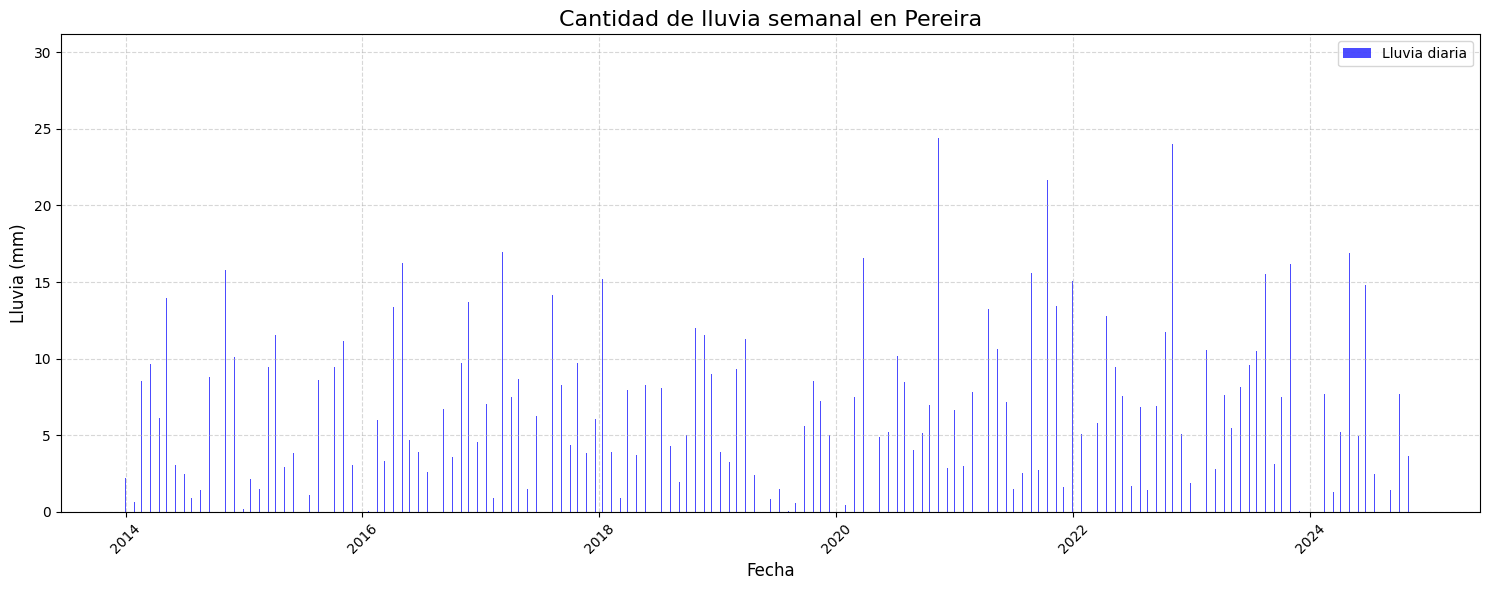

In [56]:
import matplotlib.pyplot as plt
# Gráfico de línea
plt.figure(figsize=(15, 6))
# plt.plot(weekly_avg['Fecha_Inicio'], weekly_avg['Promedio_Semanal'], label='Lluvia diaria', color='blue', alpha=0.7)
plt.bar(weekly_avg['Fecha_Inicio'], weekly_avg['Promedio_Semanal'], label='Lluvia diaria', color='blue', alpha=0.7)
plt.title('Cantidad de lluvia semanal en Pereira', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Lluvia (mm)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend()
plt.show()

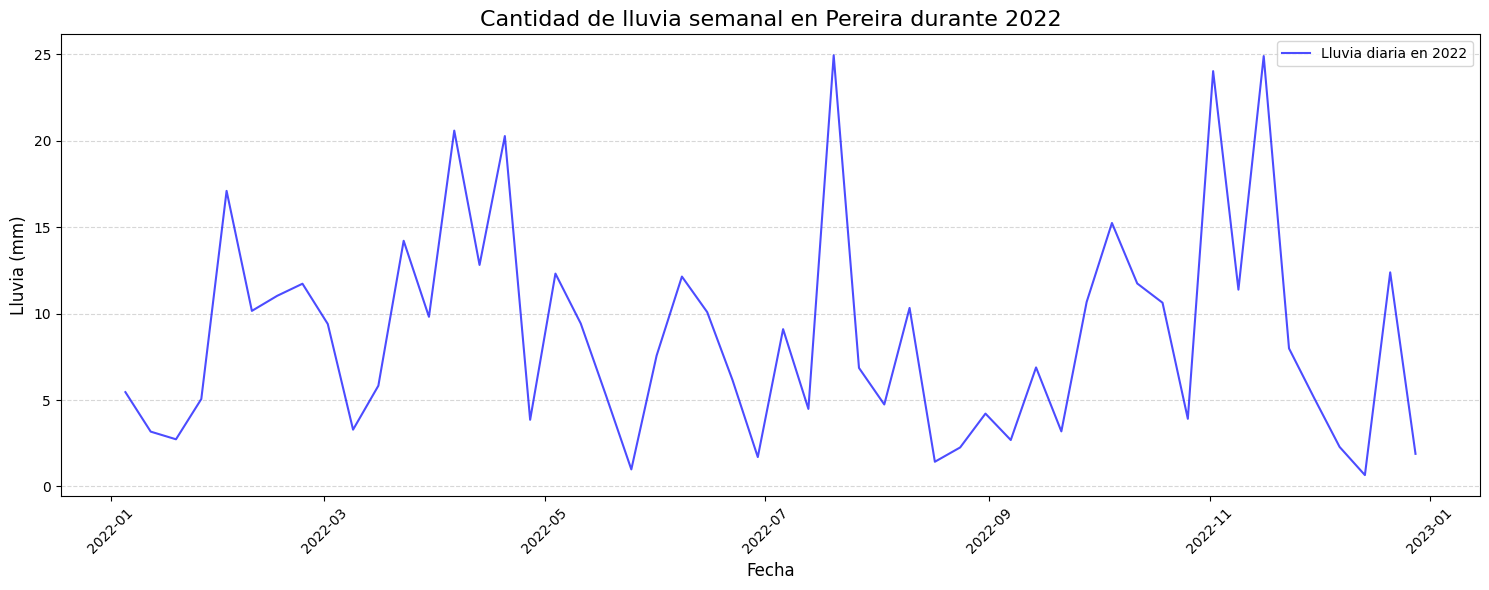

In [57]:
# Filtrar por un año específico (ejemplo: 2018)
year = 2022
filtered_df = weekly_avg[weekly_avg['Fecha_Inicio'].apply(lambda x: x.year) == year]

# Graficar en barras
plt.figure(figsize=(15, 6))
# plt.bar(filtered_df['Fecha_Inicio'], filtered_df['Promedio_Semanal'], color='blue', alpha=0.7, label=f'Lluvia diaria en {year}')
plt.plot(filtered_df['Fecha_Inicio'], filtered_df['Promedio_Semanal'], color='blue', alpha=0.7, label=f'Lluvia diaria en {year}')
plt.title(f'Cantidad de lluvia semanal en Pereira durante {year}', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Lluvia (mm)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend()
plt.show()

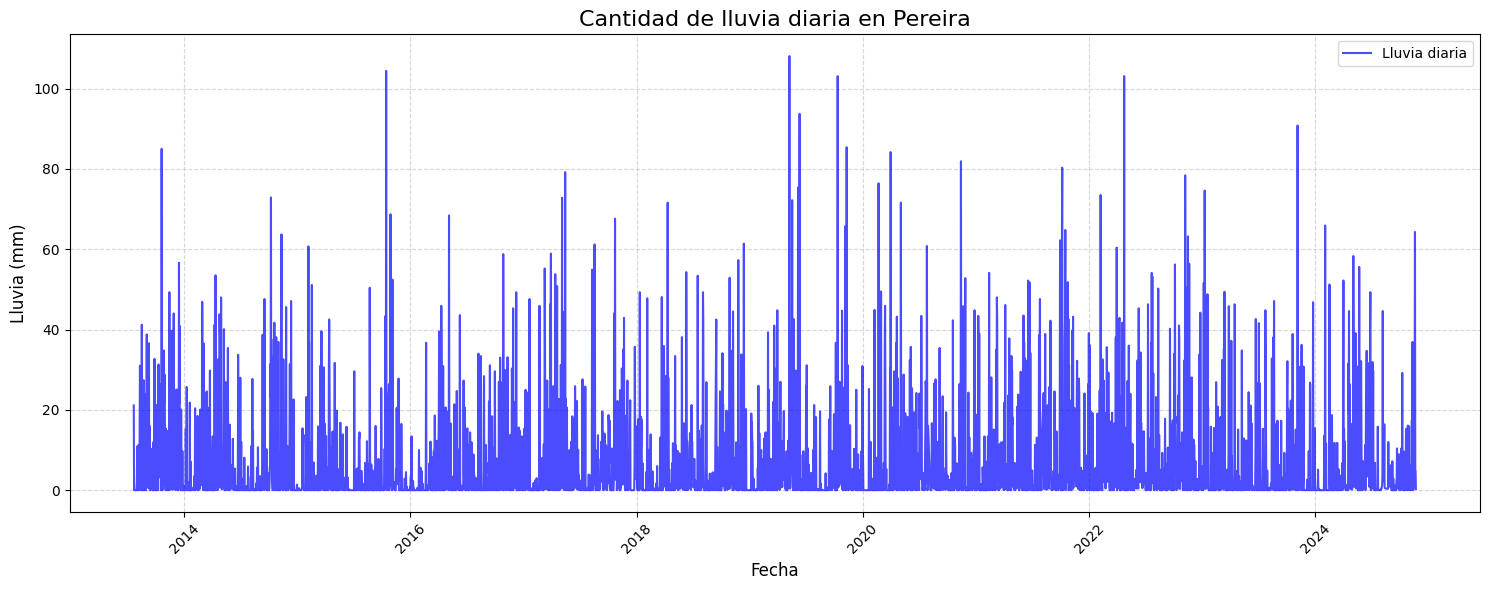

In [51]:
import matplotlib.pyplot as plt
# Gráfico de línea
plt.figure(figsize=(15, 6))
plt.plot(new_df['Fecha'], new_df['Valor'], label='Lluvia diaria', color='blue', alpha=0.7)
plt.title('Cantidad de lluvia diaria en Pereira', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Lluvia (mm)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend()
plt.show()

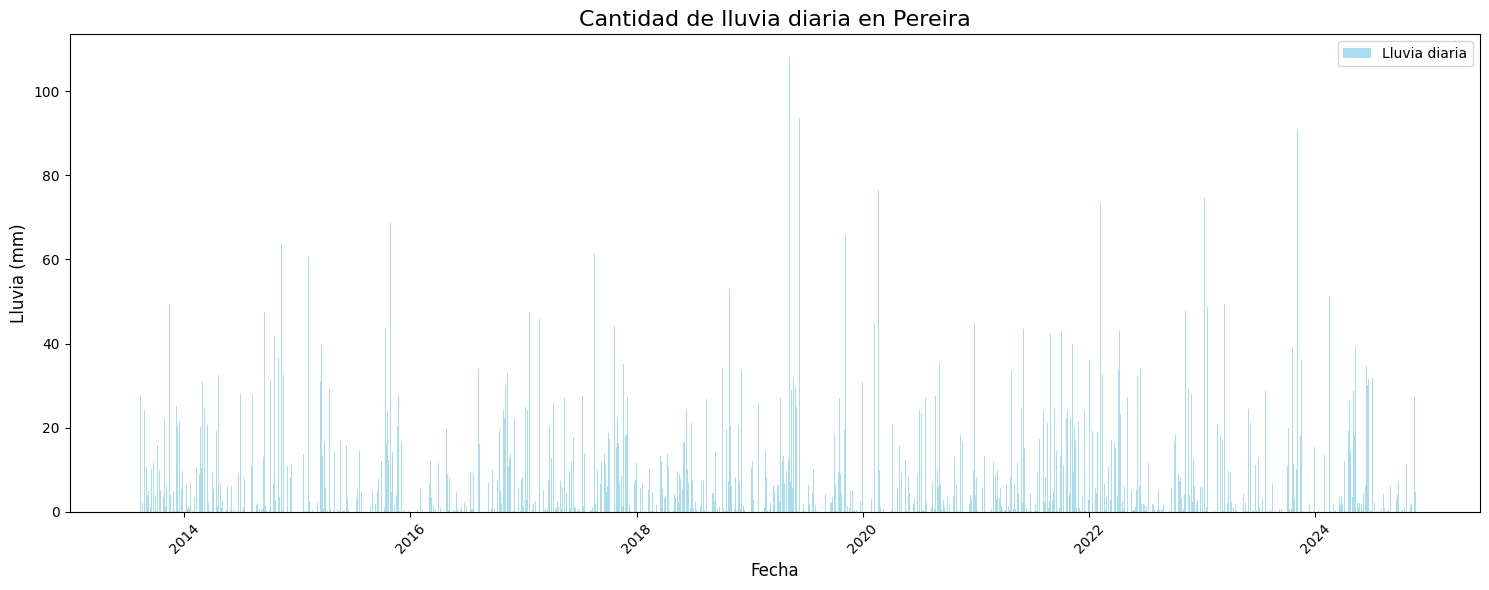

In [52]:
# Gráfico de barras (opcional para comparación)
plt.figure(figsize=(15, 6))
plt.bar(new_df['Fecha'], new_df['Valor'], color='skyblue', alpha=0.7, label='Lluvia diaria')
plt.title('Cantidad de lluvia diaria en Pereira', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Lluvia (mm)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

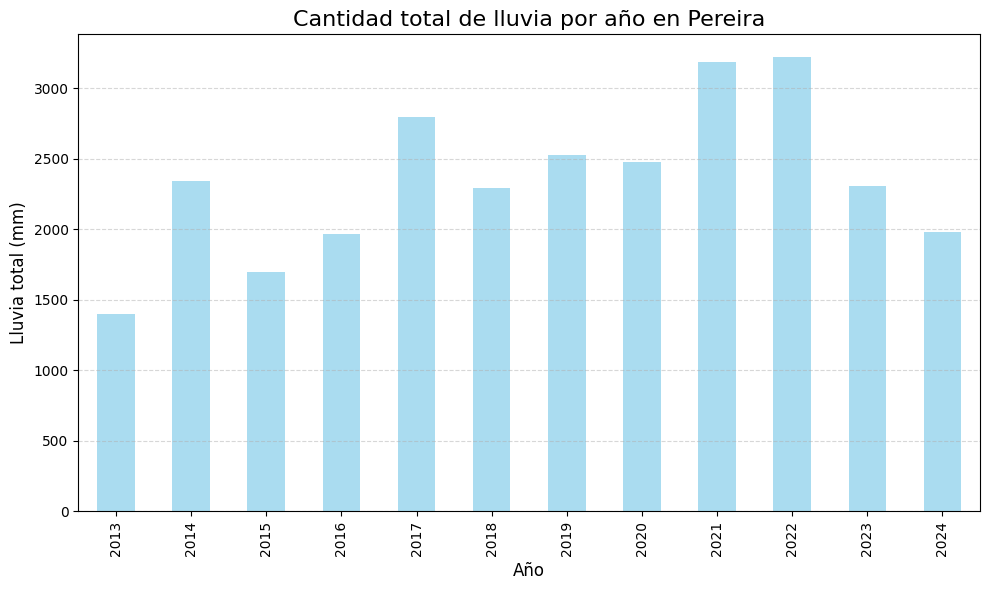

In [53]:
# Agrupar por año
new_df['Año'] = pd.to_datetime(new_df['Fecha']).dt.year
rain_by_year = new_df.groupby('Año')['Valor'].sum()

# Graficar
plt.figure(figsize=(10, 6))
rain_by_year.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Cantidad total de lluvia por año en Pereira', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Lluvia total (mm)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

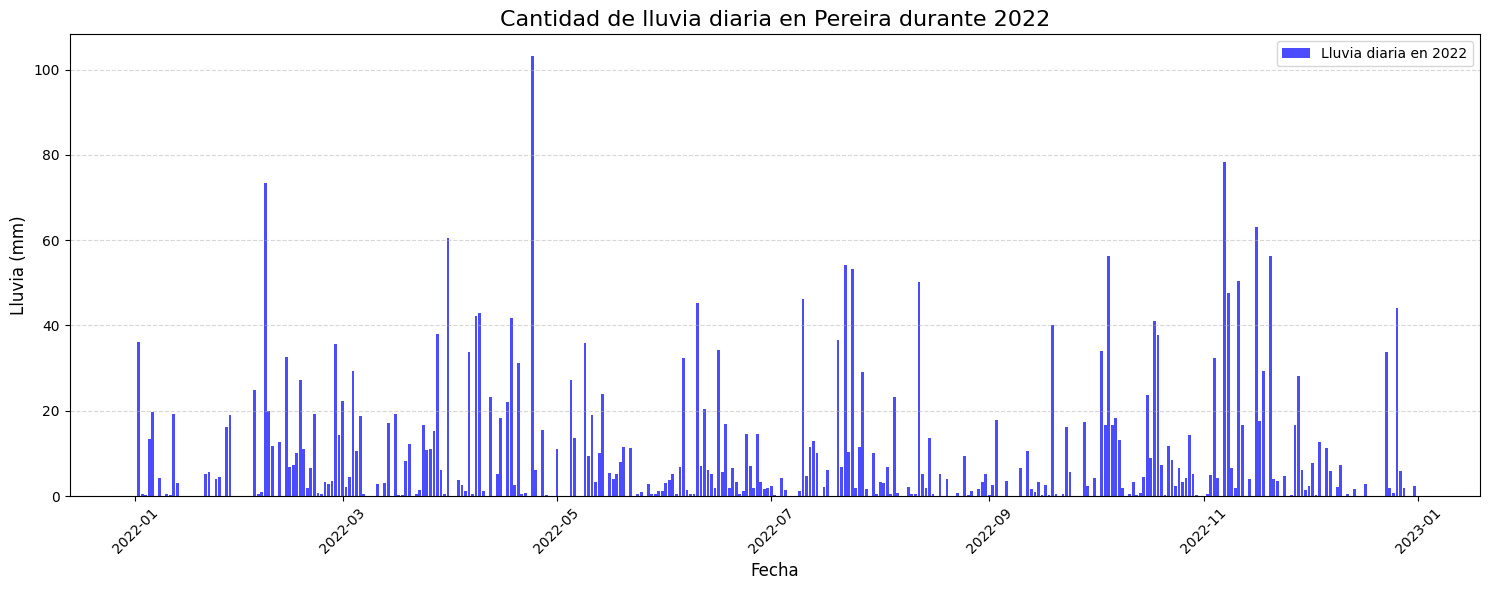

In [54]:
# Filtrar por un año específico (ejemplo: 2018)
year = 2022
filtered_df = new_df[new_df['Fecha'].apply(lambda x: x.year) == year]

# Graficar en barras
plt.figure(figsize=(15, 6))
plt.bar(filtered_df['Fecha'], filtered_df['Valor'], color='blue', alpha=0.7, label=f'Lluvia diaria en {year}')
plt.title(f'Cantidad de lluvia diaria en Pereira durante {year}', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Lluvia (mm)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend()
plt.show()


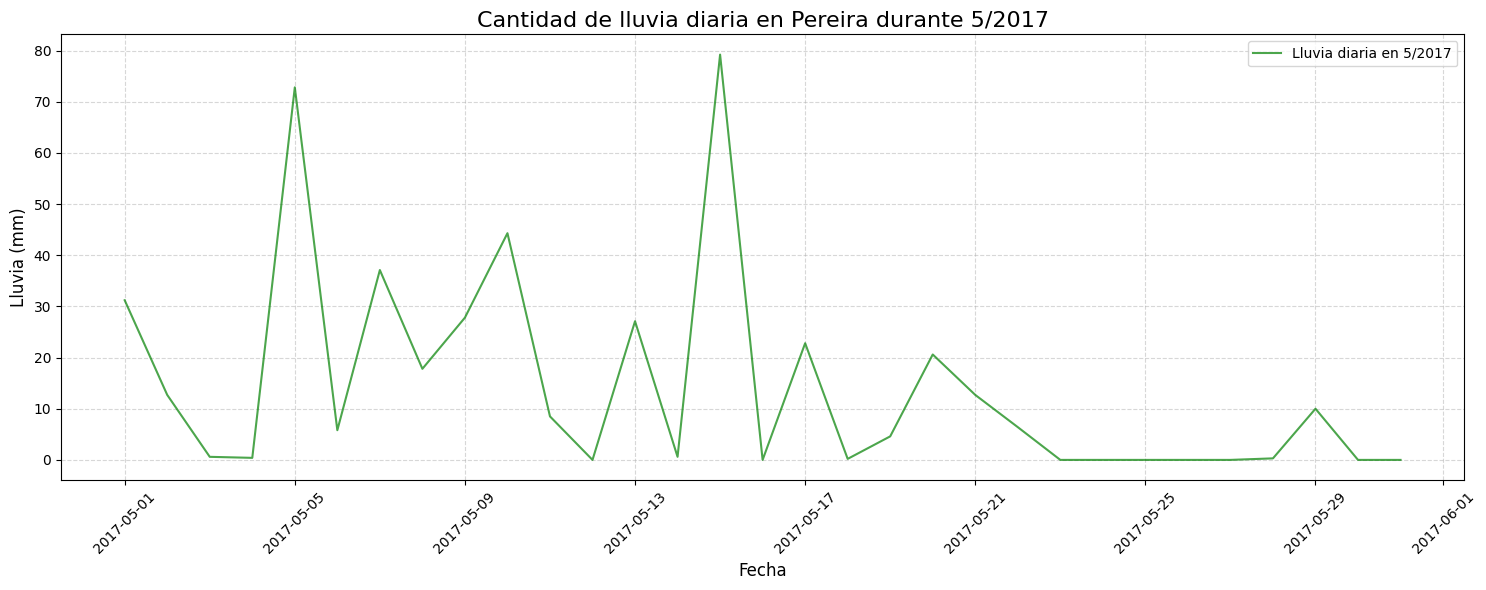

In [55]:
# Filtrar por año y mes específicos (ejemplo: agosto de 2018)
year = 2017
month = 5
filtered_df = new_df[(new_df['Fecha'].apply(lambda x: x.year) == year) & (new_df['Fecha'].apply(lambda x: x.month) == month)]

# Graficar
plt.figure(figsize=(15, 6))
# plt.bar(filtered_df['Fecha'], filtered_df['Valor'], label=f'Lluvia diaria en {month}/{year}', color='green', alpha=0.7)
plt.plot(filtered_df['Fecha'], filtered_df['Valor'], label=f'Lluvia diaria en {month}/{year}', color='green', alpha=0.7)
plt.title(f'Cantidad de lluvia diaria en Pereira durante {month}/{year}', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Lluvia (mm)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend()
plt.show()